In [1]:
import numpy as np
import hmc
import hmc_v2# as hmc
#import hmc_v3 as hmc
import matplotlib.pyplot as plt
import corner
import time
import sklearn.datasets as skld

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

limits = [(-40,40),(-40,40),(-40,40)]
nparam = len(limits)

cov = skld.make_spd_matrix(nparam)
#cov = np.eye(nparam)*100
inv_cov = np.linalg.inv(cov)


In [3]:
# def mock_posterior_and_gradient(p):
#     logP = -0.5 * np.sum(p**2)
#     logP_jacobian = p * (-1)
#     #mock_posterior_and_gradient.counter += 1
#     return logP, logP_jacobian

In [4]:
def mock_posterior_and_gradient(p):
    dlogL_dCl = - inv_cov @ p
    #j = theory_jacobian(p, *self.args).T
    logP = 0.5 * p.T @ dlogL_dCl
    #logP_jacobian = j @ dlogL_dCl
    #logP_jacobian = p * (-1)
    #mock_posterior_and_gradient.counter += 1
    return logP, dlogL_dCl

In [5]:
def run_hmc(n_it, filebase, epsilon, hmc, spit, cov):
    #rank = 5
    rank = nparam
    filename = f'{filebase}.{rank}.txt'
    #np.random.seed(100 + rank)
    #C = np.eye(nparam)
    # mass matrix
    sampler = hmc.HMC(mock_posterior_and_gradient, cov, epsilon, spit, limits)
    # first sample starts at fid
    fid_params  = np.zeros(nparam)
    results = sampler.sample(n_it, fid_params)

    # continue
    #for i in range(n_it):
        # Save chain
        #chain = np.array(sampler.trace)
        #np.savetxt(filename, chain)

        # next round of samples
        #sampler.sample(n_it)
    
    #chain = np.array(sampler.paths)
    #anti_chain = np.array(sampler.anti_paths)
    
    #tr = np.array(sampler.trace)
    #np.savetxt(filename, chain)
    return sampler

In [6]:
start = time.time()
nit = 1000
print(np.sqrt(cov))
chain = run_hmc(nit*20, "hmc_002_500", 0.02, hmc, 5, cov)
print("%.2f" %(time.time()-start))
start = time.time()
chain2 = run_hmc(nit, "hmc_002_500", 0.02, hmc_v2, 0, cov)
print("%.2f" %(time.time()-start))

<ipython-input-6-3ff71303c705>:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))


[[0.71392844        nan        nan]
 [       nan 1.67303371 1.06161909]
 [       nan 1.06161909 1.01012592]]
Accept 0 alpha=1.00  p=0.37  ΔH=0.000
Accept 10 alpha=1.00  p=0.06  ΔH=-0.000
Accept 20 alpha=1.00  p=0.54  ΔH=0.000
Accept 30 alpha=1.00  p=0.41  ΔH=-0.000
Accept 40 alpha=1.00  p=0.41  ΔH=0.000
Accept 50 alpha=1.00  p=0.33  ΔH=-0.000
Accept 60 alpha=1.00  p=0.75  ΔH=0.000
Accept 70 alpha=1.00  p=0.13  ΔH=-0.000
Accept 80 alpha=1.00  p=0.74  ΔH=-0.000
Accept 90 alpha=1.00  p=0.07  ΔH=-0.000
Accept 100 alpha=1.00  p=0.12  ΔH=-0.000
Accept 110 alpha=1.00  p=0.26  ΔH=0.000
Accept 120 alpha=1.00  p=0.10  ΔH=-0.000
Accept 130 alpha=1.00  p=0.50  ΔH=-0.000
Accept 140 alpha=1.00  p=0.26  ΔH=-0.000
Accept 150 alpha=1.00  p=0.51  ΔH=-0.000
Accept 160 alpha=1.00  p=0.16  ΔH=0.000
Accept 170 alpha=1.00  p=0.91  ΔH=-0.000
Accept 180 alpha=1.00  p=0.17  ΔH=0.000
Accept 190 alpha=1.00  p=0.07  ΔH=0.000
Accept 200 alpha=1.00  p=0.51  ΔH=-0.000
Accept 210 alpha=1.00  p=0.34  ΔH=0.000
Accept 22

Accept 2180 alpha=1.00  p=0.10  ΔH=-0.000
Accept 2190 alpha=1.00  p=0.24  ΔH=0.000
Accept 2200 alpha=1.00  p=0.63  ΔH=0.000
Accept 2210 alpha=1.00  p=0.26  ΔH=0.000
Accept 2220 alpha=1.00  p=0.06  ΔH=0.000
Accept 2230 alpha=1.00  p=1.00  ΔH=0.000
Accept 2240 alpha=1.00  p=0.81  ΔH=0.000
Accept 2250 alpha=1.00  p=0.63  ΔH=-0.000
Accept 2260 alpha=1.00  p=0.88  ΔH=-0.000
Accept 2270 alpha=1.00  p=0.29  ΔH=0.000
Accept 2280 alpha=1.00  p=0.88  ΔH=0.000
Accept 2290 alpha=1.00  p=0.59  ΔH=0.000
Accept 2300 alpha=1.00  p=0.87  ΔH=0.000
Accept 2310 alpha=1.00  p=0.77  ΔH=-0.000
Accept 2320 alpha=1.00  p=0.75  ΔH=-0.000
Accept 2330 alpha=1.00  p=0.31  ΔH=0.000
Accept 2340 alpha=1.00  p=0.68  ΔH=0.000
Accept 2350 alpha=1.00  p=0.34  ΔH=0.000
Accept 2360 alpha=1.00  p=0.18  ΔH=0.000
Accept 2370 alpha=1.00  p=0.85  ΔH=-0.000
Accept 2380 alpha=1.00  p=0.72  ΔH=-0.000
Accept 2390 alpha=1.00  p=0.63  ΔH=-0.000
Accept 2400 alpha=1.00  p=0.18  ΔH=0.000
Accept 2410 alpha=1.00  p=0.76  ΔH=-0.000
Accept 

Accept 4190 alpha=1.00  p=0.80  ΔH=0.000
Accept 4200 alpha=1.00  p=0.17  ΔH=0.000
Accept 4210 alpha=1.00  p=0.32  ΔH=-0.000
Accept 4220 alpha=1.00  p=0.71  ΔH=0.000
Accept 4230 alpha=1.00  p=0.55  ΔH=0.000
Accept 4240 alpha=1.00  p=0.38  ΔH=-0.000
Accept 4250 alpha=1.00  p=0.03  ΔH=-0.000
Accept 4260 alpha=1.00  p=0.51  ΔH=0.000
Accept 4270 alpha=1.00  p=0.50  ΔH=-0.000
Accept 4280 alpha=1.00  p=0.01  ΔH=-0.000
Accept 4290 alpha=1.00  p=0.02  ΔH=0.000
Accept 4300 alpha=1.00  p=0.32  ΔH=-0.000
Accept 4310 alpha=1.00  p=0.72  ΔH=-0.000
Accept 4320 alpha=1.00  p=0.45  ΔH=-0.000
Accept 4330 alpha=1.00  p=0.41  ΔH=0.000
Accept 4340 alpha=1.00  p=0.37  ΔH=0.000
Accept 4350 alpha=1.00  p=0.69  ΔH=-0.000
Accept 4360 alpha=1.00  p=0.18  ΔH=-0.000
Accept 4370 alpha=1.00  p=0.40  ΔH=-0.000
Accept 4380 alpha=1.00  p=0.14  ΔH=0.000
Accept 4390 alpha=1.00  p=0.99  ΔH=-0.000
Accept 4400 alpha=1.00  p=0.51  ΔH=-0.000
Accept 4410 alpha=1.00  p=0.31  ΔH=0.000
Accept 4420 alpha=1.00  p=0.61  ΔH=-0.000
Ac

Accept 6210 alpha=1.00  p=0.99  ΔH=-0.000
Accept 6220 alpha=1.00  p=0.95  ΔH=0.000
Accept 6230 alpha=1.00  p=0.10  ΔH=0.000
Accept 6240 alpha=1.00  p=0.60  ΔH=0.000
Accept 6250 alpha=1.00  p=0.85  ΔH=-0.000
Accept 6260 alpha=1.00  p=0.83  ΔH=0.000
Accept 6270 alpha=1.00  p=0.83  ΔH=0.000
Accept 6280 alpha=1.00  p=0.84  ΔH=-0.000
Accept 6290 alpha=1.00  p=0.72  ΔH=-0.000
Accept 6300 alpha=1.00  p=0.33  ΔH=-0.000
Accept 6310 alpha=1.00  p=0.18  ΔH=0.000
Accept 6320 alpha=1.00  p=0.90  ΔH=-0.000
Accept 6330 alpha=1.00  p=0.83  ΔH=0.000
Accept 6340 alpha=1.00  p=0.00  ΔH=-0.000
Accept 6350 alpha=1.00  p=0.41  ΔH=0.000
Accept 6360 alpha=1.00  p=0.76  ΔH=0.000
Accept 6370 alpha=1.00  p=0.39  ΔH=0.000
Accept 6380 alpha=1.00  p=0.76  ΔH=0.000
Accept 6390 alpha=1.00  p=0.09  ΔH=0.000
Accept 6400 alpha=1.00  p=0.28  ΔH=0.000
Accept 6410 alpha=1.00  p=0.35  ΔH=0.000
Accept 6420 alpha=1.00  p=0.82  ΔH=-0.000
Accept 6430 alpha=1.00  p=0.55  ΔH=0.000
Accept 6440 alpha=1.00  p=0.61  ΔH=-0.000
Accept 

Accept 8370 alpha=1.00  p=0.25  ΔH=-0.000
Accept 8380 alpha=1.00  p=0.59  ΔH=-0.000
Accept 8390 alpha=1.00  p=0.53  ΔH=0.000
Accept 8400 alpha=1.00  p=0.51  ΔH=0.000
Accept 8410 alpha=1.00  p=0.71  ΔH=-0.000
Accept 8420 alpha=1.00  p=0.96  ΔH=0.000
Accept 8430 alpha=1.00  p=0.69  ΔH=-0.000
Accept 8440 alpha=1.00  p=0.24  ΔH=0.000
Accept 8450 alpha=1.00  p=0.74  ΔH=-0.000
Accept 8460 alpha=1.00  p=0.50  ΔH=-0.000
Accept 8470 alpha=1.00  p=0.06  ΔH=-0.000
Accept 8480 alpha=1.00  p=0.89  ΔH=-0.000
Accept 8490 alpha=1.00  p=0.14  ΔH=-0.000
Accept 8500 alpha=1.00  p=0.77  ΔH=-0.000
Accept 8510 alpha=1.00  p=0.91  ΔH=0.000
Accept 8520 alpha=1.00  p=0.14  ΔH=-0.000
Accept 8530 alpha=1.00  p=0.52  ΔH=0.000
Accept 8540 alpha=1.00  p=0.51  ΔH=0.000
Accept 8550 alpha=1.00  p=0.47  ΔH=0.000
Accept 8560 alpha=1.00  p=0.19  ΔH=0.000
Accept 8570 alpha=1.00  p=0.79  ΔH=-0.000
Accept 8580 alpha=1.00  p=0.64  ΔH=-0.000
Accept 8590 alpha=1.00  p=0.17  ΔH=0.000
Accept 8600 alpha=1.00  p=0.35  ΔH=0.000
Acc

Accept 10340 alpha=1.00  p=0.37  ΔH=-0.000
Accept 10350 alpha=1.00  p=0.21  ΔH=-0.000
Accept 10360 alpha=1.00  p=0.88  ΔH=-0.000
Accept 10370 alpha=1.00  p=0.93  ΔH=0.000
Accept 10380 alpha=1.00  p=0.61  ΔH=0.000
Accept 10390 alpha=1.00  p=0.82  ΔH=0.000
Accept 10400 alpha=1.00  p=0.12  ΔH=0.000
Accept 10410 alpha=1.00  p=0.34  ΔH=0.000
Accept 10420 alpha=1.00  p=0.58  ΔH=-0.000
Accept 10430 alpha=1.00  p=0.41  ΔH=-0.000
Accept 10440 alpha=1.00  p=0.26  ΔH=-0.000
Accept 10450 alpha=1.00  p=0.20  ΔH=0.000
Accept 10460 alpha=1.00  p=0.87  ΔH=-0.000
Accept 10470 alpha=1.00  p=0.20  ΔH=0.000
Accept 10480 alpha=1.00  p=0.44  ΔH=-0.000
Accept 10490 alpha=1.00  p=0.05  ΔH=-0.000
Accept 10500 alpha=1.00  p=0.21  ΔH=0.000
Accept 10510 alpha=1.00  p=0.10  ΔH=0.000
Accept 10520 alpha=1.00  p=0.60  ΔH=-0.000
Accept 10530 alpha=1.00  p=0.76  ΔH=-0.000
Accept 10540 alpha=1.00  p=0.35  ΔH=0.000
Accept 10550 alpha=1.00  p=0.21  ΔH=0.000
Accept 10560 alpha=1.00  p=0.21  ΔH=-0.000
Accept 10570 alpha=1.0

Accept 12310 alpha=1.00  p=0.95  ΔH=0.000
Accept 12320 alpha=1.00  p=0.42  ΔH=-0.000
Accept 12330 alpha=1.00  p=0.10  ΔH=0.000
Accept 12340 alpha=1.00  p=0.17  ΔH=0.000
Accept 12350 alpha=1.00  p=0.58  ΔH=-0.000
Accept 12360 alpha=1.00  p=0.47  ΔH=0.000
Accept 12370 alpha=1.00  p=0.59  ΔH=0.000
Accept 12380 alpha=1.00  p=0.42  ΔH=0.000
Accept 12390 alpha=1.00  p=0.98  ΔH=0.000
Accept 12400 alpha=1.00  p=0.44  ΔH=0.000
Accept 12410 alpha=1.00  p=0.67  ΔH=0.000
Accept 12420 alpha=1.00  p=0.91  ΔH=-0.000
Accept 12430 alpha=1.00  p=0.54  ΔH=-0.000
Accept 12440 alpha=1.00  p=0.93  ΔH=0.000
Accept 12450 alpha=1.00  p=0.57  ΔH=0.000
Accept 12460 alpha=1.00  p=0.98  ΔH=-0.000
Accept 12470 alpha=1.00  p=0.78  ΔH=0.000
Accept 12480 alpha=1.00  p=0.29  ΔH=-0.000
Accept 12490 alpha=1.00  p=0.97  ΔH=0.000
Accept 12500 alpha=1.00  p=0.01  ΔH=-0.000
Accept 12510 alpha=1.00  p=0.87  ΔH=0.000
Accept 12520 alpha=1.00  p=0.66  ΔH=-0.000
Accept 12530 alpha=1.00  p=0.02  ΔH=-0.000
Accept 12540 alpha=1.00  

Accept 14280 alpha=1.00  p=0.11  ΔH=-0.000
Accept 14290 alpha=1.00  p=0.64  ΔH=-0.000
Accept 14300 alpha=1.00  p=0.61  ΔH=-0.000
Accept 14310 alpha=1.00  p=0.85  ΔH=0.000
Accept 14320 alpha=1.00  p=0.73  ΔH=-0.000
Accept 14330 alpha=1.00  p=0.87  ΔH=-0.000
Accept 14340 alpha=1.00  p=0.10  ΔH=0.000
Accept 14350 alpha=1.00  p=0.66  ΔH=-0.000
Accept 14360 alpha=1.00  p=0.53  ΔH=-0.000
Accept 14370 alpha=1.00  p=0.68  ΔH=-0.000
Accept 14380 alpha=1.00  p=0.42  ΔH=-0.000
Accept 14390 alpha=1.00  p=0.88  ΔH=-0.000
Accept 14400 alpha=1.00  p=0.10  ΔH=-0.000
Accept 14410 alpha=1.00  p=0.27  ΔH=-0.000
Accept 14420 alpha=1.00  p=0.53  ΔH=0.000
Accept 14430 alpha=1.00  p=0.06  ΔH=0.000
Accept 14440 alpha=1.00  p=0.77  ΔH=0.000
Accept 14450 alpha=1.00  p=0.06  ΔH=-0.000
Accept 14460 alpha=1.00  p=0.53  ΔH=-0.000
Accept 14470 alpha=1.00  p=0.17  ΔH=-0.000
Accept 14480 alpha=1.00  p=0.53  ΔH=0.000
Accept 14490 alpha=1.00  p=0.64  ΔH=0.000
Accept 14500 alpha=1.00  p=0.01  ΔH=-0.000
Accept 14510 alpha

Accept 16260 alpha=1.00  p=0.17  ΔH=0.000
Accept 16270 alpha=1.00  p=0.99  ΔH=0.000
Accept 16280 alpha=1.00  p=0.05  ΔH=0.000
Accept 16290 alpha=1.00  p=0.35  ΔH=0.000
Accept 16300 alpha=1.00  p=0.00  ΔH=-0.000
Accept 16310 alpha=1.00  p=0.75  ΔH=-0.000
Accept 16320 alpha=1.00  p=0.28  ΔH=0.000
Accept 16330 alpha=1.00  p=0.09  ΔH=-0.000
Accept 16340 alpha=1.00  p=0.40  ΔH=-0.000
Accept 16350 alpha=1.00  p=0.29  ΔH=0.000
Accept 16360 alpha=1.00  p=0.82  ΔH=-0.000
Accept 16370 alpha=1.00  p=0.25  ΔH=-0.000
Accept 16380 alpha=1.00  p=0.84  ΔH=-0.000
Accept 16390 alpha=1.00  p=0.90  ΔH=-0.000
Accept 16400 alpha=1.00  p=0.44  ΔH=-0.000
Accept 16410 alpha=1.00  p=0.68  ΔH=-0.000
Accept 16420 alpha=1.00  p=0.99  ΔH=-0.000
Accept 16430 alpha=1.00  p=0.29  ΔH=-0.000
Accept 16440 alpha=1.00  p=0.71  ΔH=0.000
Accept 16450 alpha=1.00  p=0.21  ΔH=-0.000
Accept 16460 alpha=1.00  p=0.63  ΔH=-0.000
Accept 16470 alpha=1.00  p=0.65  ΔH=0.000
Accept 16480 alpha=1.00  p=0.50  ΔH=-0.000
Accept 16490 alpha=

Accept 18200 alpha=1.00  p=0.96  ΔH=0.000
Accept 18210 alpha=1.00  p=0.54  ΔH=0.000
Accept 18220 alpha=1.00  p=0.71  ΔH=0.000
Accept 18230 alpha=1.00  p=0.16  ΔH=0.000
Accept 18240 alpha=1.00  p=0.42  ΔH=-0.000
Accept 18250 alpha=1.00  p=0.18  ΔH=-0.000
Accept 18260 alpha=1.00  p=0.83  ΔH=0.000
Accept 18270 alpha=1.00  p=0.10  ΔH=-0.000
Accept 18280 alpha=1.00  p=0.36  ΔH=-0.000
Accept 18290 alpha=1.00  p=0.18  ΔH=0.000
Accept 18300 alpha=1.00  p=0.49  ΔH=0.000
Accept 18310 alpha=1.00  p=0.84  ΔH=0.000
Accept 18320 alpha=1.00  p=1.00  ΔH=0.000
Accept 18330 alpha=1.00  p=0.12  ΔH=0.000
Accept 18340 alpha=1.00  p=0.38  ΔH=0.000
Accept 18350 alpha=1.00  p=0.37  ΔH=0.000
Accept 18360 alpha=1.00  p=0.94  ΔH=-0.000
Accept 18370 alpha=1.00  p=0.05  ΔH=0.000
Accept 18380 alpha=1.00  p=0.99  ΔH=-0.000
Accept 18390 alpha=1.00  p=0.44  ΔH=0.000
Accept 18400 alpha=1.00  p=0.19  ΔH=-0.000
Accept 18410 alpha=1.00  p=0.19  ΔH=-0.000
Accept 18420 alpha=1.00  p=0.98  ΔH=-0.000
Accept 18430 alpha=1.00  

Accept 140 alpha=1.00  p=0.08  ΔH=-0.000
Accept 150 alpha=1.00  p=0.63  ΔH=0.000
Accept 160 alpha=1.00  p=0.09  ΔH=0.000
Accept 170 alpha=1.00  p=0.62  ΔH=-0.000
Accept 180 alpha=1.00  p=0.62  ΔH=0.000
Accept 190 alpha=1.00  p=0.71  ΔH=-0.000
Accept 200 alpha=1.00  p=0.27  ΔH=-0.000
Accept 210 alpha=1.00  p=0.16  ΔH=-0.000
Accept 220 alpha=1.00  p=0.54  ΔH=-0.000
Accept 230 alpha=1.00  p=0.38  ΔH=-0.000
Accept 240 alpha=1.00  p=0.94  ΔH=-0.000
Accept 250 alpha=1.00  p=0.05  ΔH=0.000
Accept 260 alpha=1.00  p=0.59  ΔH=0.000
Accept 270 alpha=1.00  p=0.41  ΔH=-0.000
Accept 280 alpha=1.00  p=0.04  ΔH=-0.000
Accept 290 alpha=1.00  p=0.61  ΔH=0.000
Accept 300 alpha=1.00  p=0.70  ΔH=-0.000
Accept 310 alpha=1.00  p=0.52  ΔH=0.000
Accept 320 alpha=1.00  p=0.06  ΔH=0.000
Accept 330 alpha=1.00  p=0.92  ΔH=0.000
Accept 340 alpha=1.00  p=0.46  ΔH=-0.000
Accept 350 alpha=1.00  p=0.69  ΔH=0.000
Accept 360 alpha=1.00  p=0.13  ΔH=-0.000
Accept 370 alpha=1.00  p=0.77  ΔH=-0.000
Accept 380 alpha=1.00  p=0

In [7]:
#paths = np.array(chain.paths)
#anti_paths = np.array(chain.anti_paths)
trace = np.array(chain.trace)
trace2 = np.array(chain2.trace)

calls = np.array(chain.ncall_list)
calls2 = np.array(chain2.ncall_list)

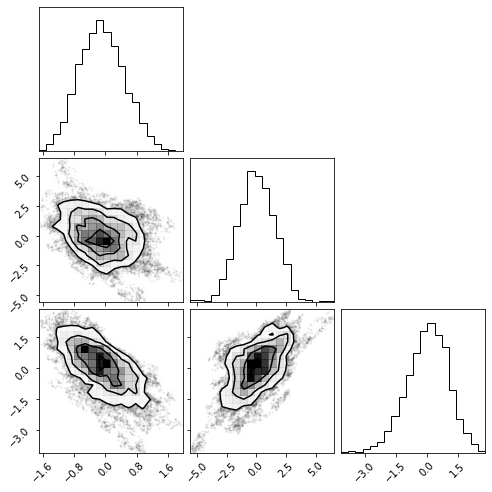

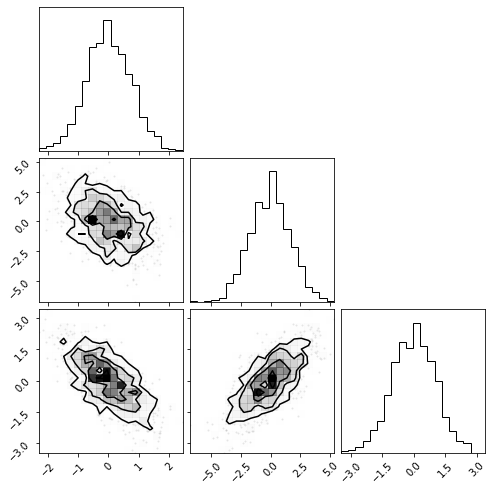

In [8]:
#plt.scatter(paths[:,0],paths[:,1],s=3)
#plt.scatter(anti_paths[:,0],anti_paths[:,1],s=3)
#plt.show()

#plt.scatter(trace[:,0],trace[:,1],s=5)
#plt.show()

figure = corner.corner(trace)
figure2 = corner.corner(trace2)

In [9]:
def plot_conv(trace,dim,botlim,toplim, hmc, cov, calls):
    STDs, means = [], []
    for i in range(trace.shape[0]):
        STD=np.std(trace[:i,dim])
        STDs.append(STD/np.sqrt(cov[dim,dim]))
        means.append(np.mean(trace[:i,dim]))
    plt.plot(calls, STDs, label="STD/sigma hmc %s" %hmc)
    plt.plot(calls, means, label="mean hmc %s" %hmc)
    plt.hlines([0,1],0,calls[-1],ls=":", color="k")
    plt.legend()
    plt.title("Mean & STD vs L-calls for dim %.0f" %dim)
    plt.ylim(botlim,toplim)
    
    print(np.std(trace[:,dim]))
    

<ipython-input-10-93b47e9ea3d1>:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(cov))
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[0.71392844        nan        nan]
 [       nan 1.67303371 1.06161909]
 [       nan 1.06161909 1.01012592]]
1.0398775249327634
1.0504285597008283


/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


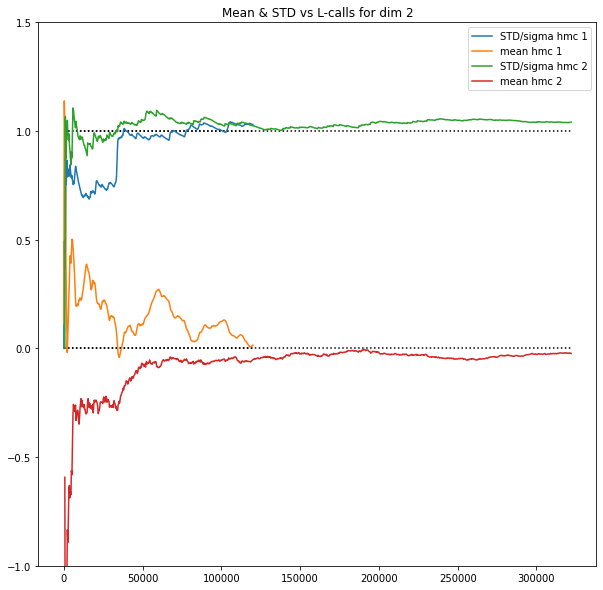

In [10]:
print(np.sqrt(cov))

plot_conv(trace,2,-1,1.5,1, cov, calls)
plot_conv(trace2,2,-1,1.5,2, cov, calls2)
plt.show()